#### Importing Libraries

In [14]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import os as os
import seaborn as sns
import matplotlib.pyplot as plt

#### Load and Preview Dataset

In [15]:
# Load the dataset 
df = pd.read_csv('../../data/togo.csv', encoding='latin1', parse_dates=['Timestamp'])
# Optional: Display the first few rows
df.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_18748\1772878744.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/togo.csv', encoding='latin1', parse_dates=['Timestamp'])
C:\Users\pc\AppData\Local\Temp\ipykernel_18748\1772878744.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../../data/togo.csv', encoding='latin1', parse_dates=['Timestamp'])


Timestamp   GHI   DNI   DHI  ModA  ModB  Tamb    RH   WS WSgust  \
0  yyyy-mm-dd hh:mm  W/m²  W/m²  W/m²  W/m²  W/m²    °C     %  m/s    m/s   
1  2021-10-25 00:01  -1.3     0     0     0     0  24.8  94.5  0.9    1.1   
2  2021-10-25 00:02  -1.3     0     0     0     0  24.8  94.4  1.1    1.6   
3  2021-10-25 00:03  -1.3     0     0     0     0  24.8  94.4  1.2    1.4   
4  2021-10-25 00:04  -1.2     0     0     0     0  24.8  94.3  1.2    1.6   

  WSstdev            WD WDstdev   BP Cleaning Precipitation TModA TModB  \
0     m/s  °N (to east)       °  hPa   1 or 0        mm/min    °C    °C   
1     0.4         227.6     1.1  977        0             0  24.7  24.4   
2     0.4         229.3     0.7  977        0             0  24.7  24.4   
3     0.3         228.5     2.9  977        0             0  24.7  24.4   
4     0.3         229.1     4.6  977        0             0  24.7  24.4   

  GHIrsi  Comments  
0   W/m²       NaN  
1      0       NaN  
2      0       NaN  
3      0       NaN  
4      0       NaN

####  Convert Timestamp and Clean Column Types

In [16]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
# Convert all other columns (except Timestamp and Comments) to numeric
for col in df.columns:
    if col not in ['Timestamp', 'Comments']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

C:\Users\pc\AppData\Local\Temp\ipykernel_18748\3908643666.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  float64       
 14  Cleaning       525600 non-null  float64       
 15  

#### Summary Stats & Missing Value Report

In [17]:
# Summary statistics
print("Summary Statistics:")
display(df.describe())

# Missing value report
missing_report = df.isna().sum()
missing_report = missing_report[missing_report > 0]
print("\nMissing Values:")
print(missing_report)

# Columns with >5% missing
threshold = 0.05 * len(df)
print("\nColumns with >5% Missing:")
print(missing_report[missing_report > threshold])

Summary Statistics:


Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:29.999999232     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         2.500000       4.400000       4.300000      27.200000   
75%       215.700000     422.525000     411.000000      31.100000   
max       805.700000    1380.000000    1367.000000      41.400000   
std       156.520714     317.346938     307.932510       4.758023   

                  RH             WS         WSgust        WSstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       55.013160       2.368093       3.229490       0.557740   
min         3.300000       0.000000       0.000000       0.000000   
25%        26.500000       1.400000       1.900000       0.400000   
50%        59.300000       2.200000       2.900000       0.500000   
75%        80.800000       3.200000       4.400000       0.700000   
max        99.800000      16.100000      23.100000       4.700000   
std        28.778732       1.462668       1.882565       0.268923   

                  WD        WDstdev             BP       Cleaning  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      161.741845      10.559568     975.915242       0.000535   
min         0.000000       0.000000     968.000000       0.000000   
25%        74.800000       6.900000     975.000000       0.000000   
50%       199.100000      10.800000     976.000000       0.000000   
75%       233.500000      14.100000     977.000000       0.000000   
max       360.000000      86.900000     983.000000       1.000000   
std        91.877217       5.915490       2.153977       0.023116   

       Precipitation          TModA          TModB         GHIrsi  Comments  
count  525600.000000  525600.000000  525600.000000  525600.000000       0.0  
mean        0.001382      32.444403      33.543330     227.765822       NaN  
min         0.000000      13.100000      13.100000       0.000000       NaN  
25%         0.000000      23.900000      23.600000       0.000000       NaN  
50%         0.000000      28.400000      28.400000       2.500000       NaN  
75%         0.000000      40.600000      43.000000     431.500000       NaN  
max         2.300000      70.400000      94.600000    1424.800000       NaN  
std         0.026350      10.998334      12.769277     316.931191       NaN


Missing Values:
Timestamp             1
GHI                   1
DNI                   1
DHI                   1
ModA                  1
ModB                  1
Tamb                  1
RH                    1
WS                    1
WSgust                1
WSstdev               1
WD                    1
WDstdev               1
BP                    1
Cleaning              1
Precipitation         1
TModA                 1
TModB                 1
GHIrsi                1
Comments         525601
dtype: int64

Columns with >5% Missing:
Comments    525601
dtype: int64


#### Outlier Detection with Z-Scores

In [18]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate z-scores
z_scores = df[key_columns].apply(zscore)

# Flag outliers
outliers = (np.abs(z_scores) > 3)
print(f"Outliers detected:\n{outliers.sum()}")
df['cleaned_flag'] = ~outliers.any(axis=1)  # True = clean row


Outliers detected:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


#### Handle Missing Values & Export Cleaned Dataset

In [19]:
# Impute missing values in key columns with median
for col in key_columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Optional: drop non-essential columns with too many nulls (manual decision if needed)

# Export cleaned data
df_clean = df[df['cleaned_flag']].copy()
df_clean.to_csv('../../data/togo_clean.csv', index=False)

print("Cleaned data exported to: ../../data/togo_clean.csv")

Cleaned data exported to: ../../data/togo_clean.csv


#### Monthly Trends of Solar Irradiance & Temperature

C:\Users\pc\AppData\Local\Temp\ipykernel_18748\1032880048.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()


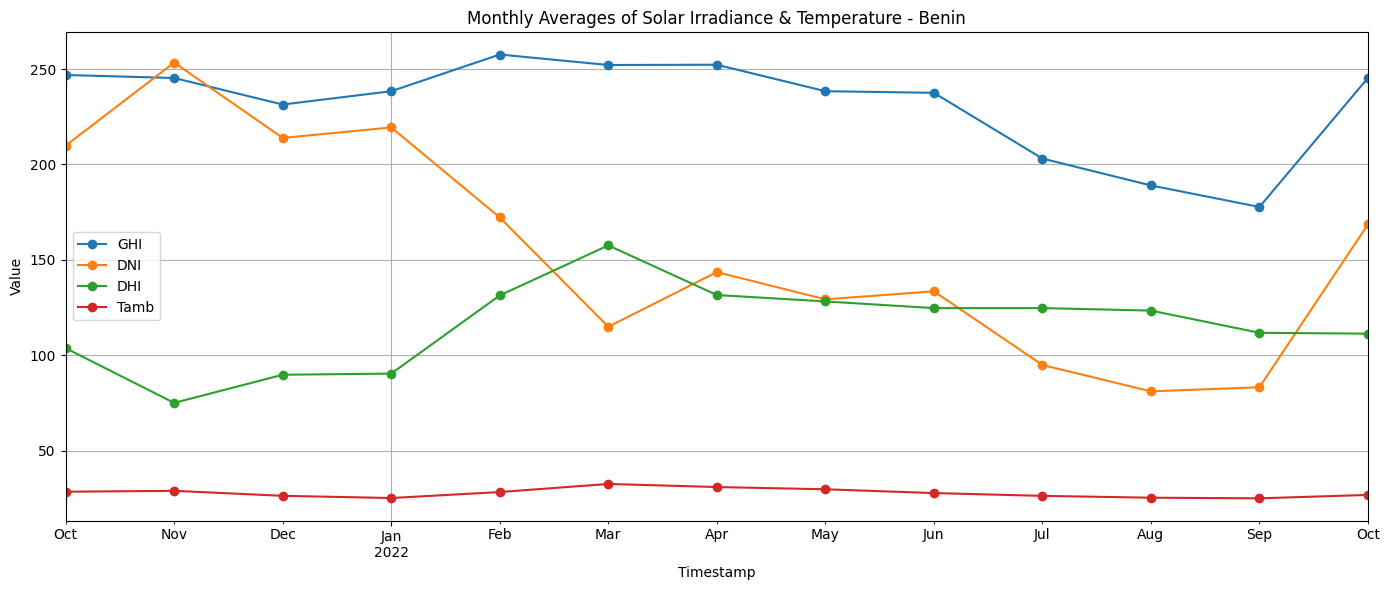

In [20]:
# Ensure Timestamp is datetime and set as index
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Resample monthly averages
monthly_avg = df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()

# Plot
monthly_avg.plot(figsize=(14, 6), marker='o')
plt.title("Monthly Averages of Solar Irradiance & Temperature - Benin")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Impact of Cleaning on ModA and ModB Values

C:\Users\pc\AppData\Local\Temp\ipykernel_18748\2122481307.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_full = pd.read_csv('../../data/togo.csv', parse_dates=['Timestamp'], encoding='latin1', low_memory=False)
C:\Users\pc\AppData\Local\Temp\ipykernel_18748\2122481307.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_full[col].fillna(median_val, inplace=True)
C:\Users\pc\AppD

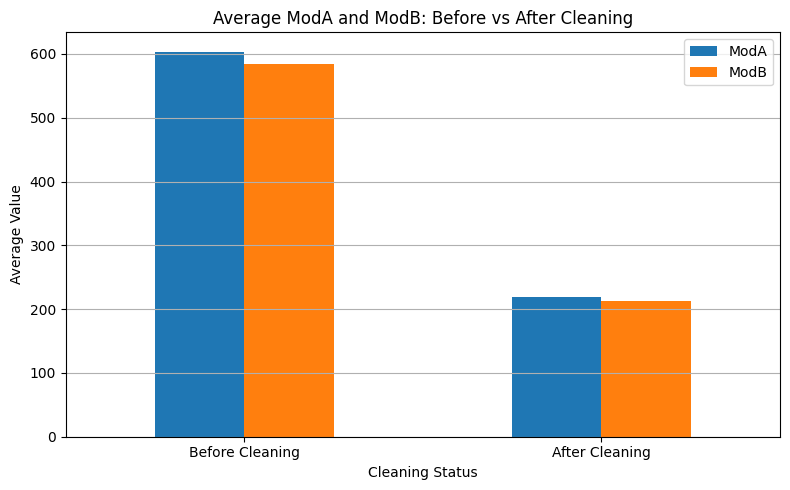

In [21]:
# Load full original data again to compare pre-cleaning
df_full = pd.read_csv('../../data/togo.csv', parse_dates=['Timestamp'], encoding='latin1', low_memory=False)

key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Convert key columns to numeric, coercing errors to NaN
for col in key_columns:
    df_full[col] = pd.to_numeric(df_full[col], errors='coerce')

# Fill NaNs in key columns with median (or drop rows with NaN if preferred)
for col in key_columns:
    median_val = df_full[col].median()
    df_full[col].fillna(median_val, inplace=True)

# Compute z-scores on the cleaned numeric data
z_scores_full = df_full[key_columns].apply(zscore)

# Flag rows where any |z-score| > 3 as outliers (False = outlier, True = clean)
df_full['cleaned_flag'] = ~z_scores_full.abs().gt(3).any(axis=1)

# Group by cleaning flag and compute mean of ModA and ModB
impact_avg = df_full.groupby('cleaned_flag')[['ModA', 'ModB']].mean()
impact_avg.index = ['Before Cleaning', 'After Cleaning']

# Plot the comparison
impact_avg.plot(kind='bar', figsize=(8, 5), rot=0)
plt.title('Average ModA and ModB: Before vs After Cleaning')
plt.ylabel('Average Value')
plt.xlabel('Cleaning Status')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

#### Correlation Heatmap & Scatter Plots for Key Variables

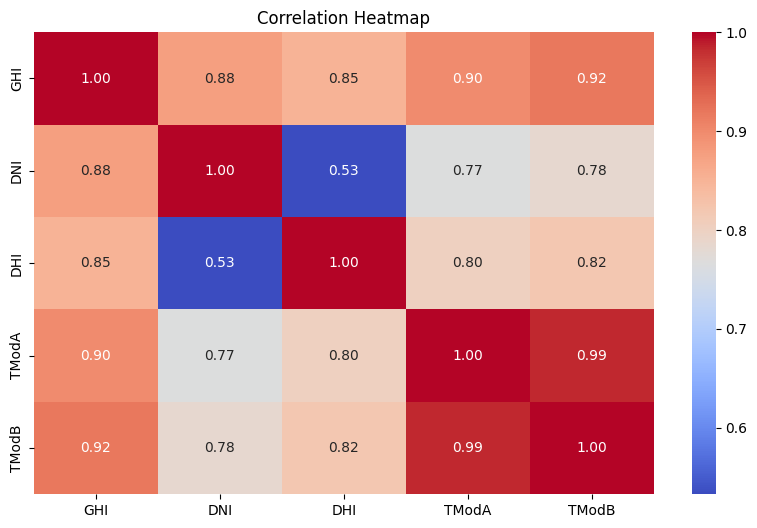

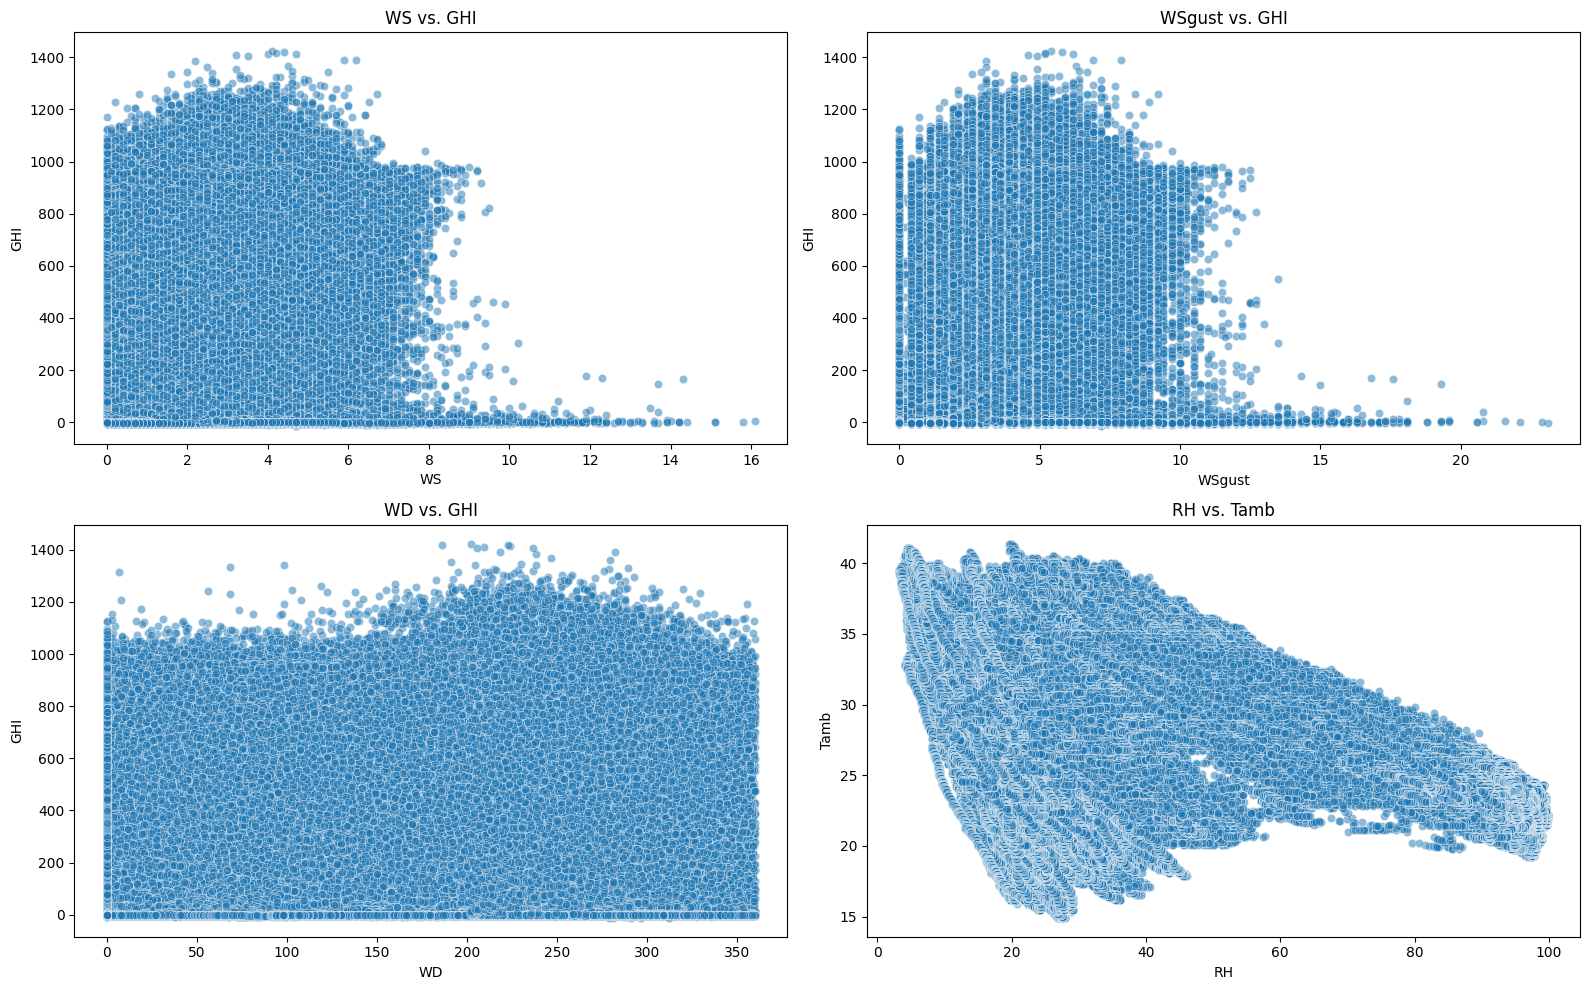

In [22]:
# Heatmap
plt.figure(figsize=(10, 6))
corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots
plt.figure(figsize=(16, 10))
for i, col in enumerate(['WS', 'WSgust', 'WD']):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df_clean, x=col, y='GHI', alpha=0.5)
    plt.title(f'{col} vs. GHI')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title('RH vs. Tamb')
plt.tight_layout()
plt.show()


#### Distribution Analysis & Wind Rose Visualization

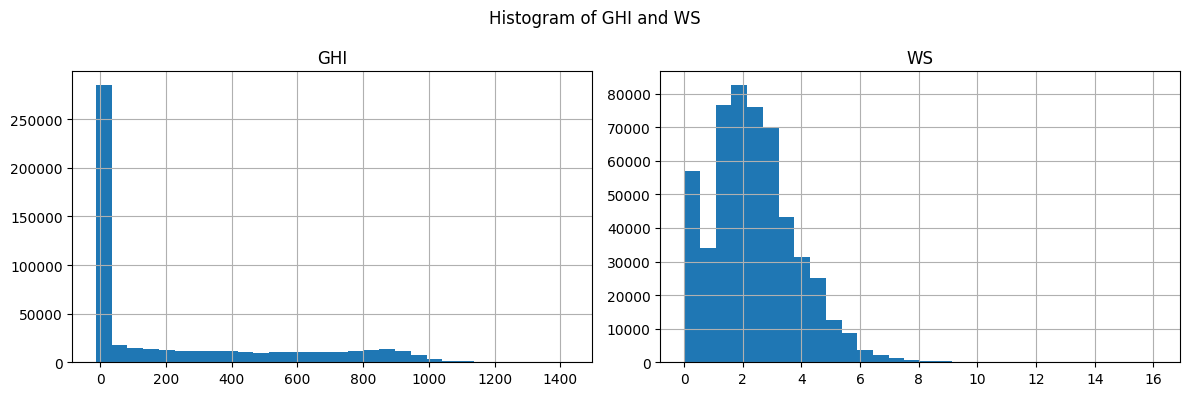

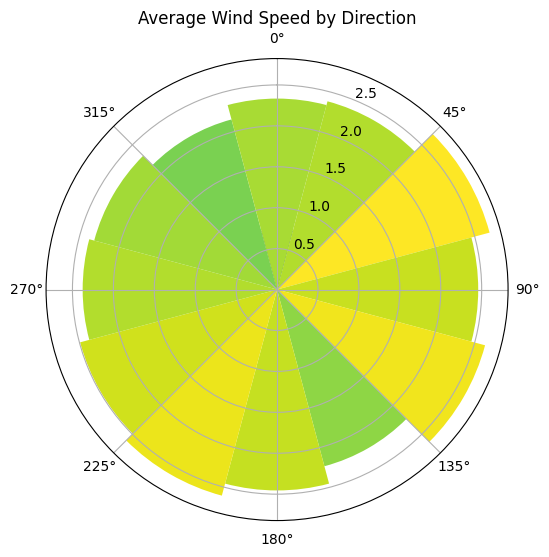

In [23]:
# Histograms
df_clean[['GHI', 'WS']].hist(bins=30, figsize=(12, 4), layout=(1, 2))
plt.suptitle("Histogram of GHI and WS")
plt.tight_layout()
plt.show()

# Wind rose (simplified radial plot)
import matplotlib.cm as cm
df_clean['WD_bin'] = (df_clean['WD'] // 30) * 30  # binning directions

wind_rose = df_clean.groupby('WD_bin')['WS'].mean()
angles = np.deg2rad(wind_rose.index)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
bars = ax.bar(angles, wind_rose.values, width=np.deg2rad(30), bottom=0.0, color=cm.viridis(wind_rose.values / max(wind_rose.values)))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.title("Average Wind Speed by Direction")
plt.show()


#### Scatter Plot: Relative Humidity vs Global Horizontal Irradiance (GHI)

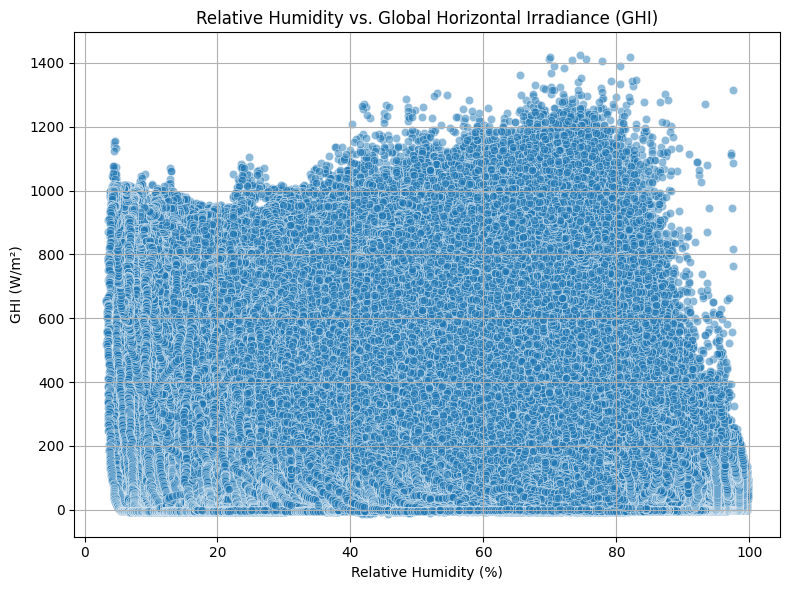

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.5)
plt.title('Relative Humidity vs. Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Bubble Plot: GHI vs Ambient Temperature (Bubble size = Relative Humidity)

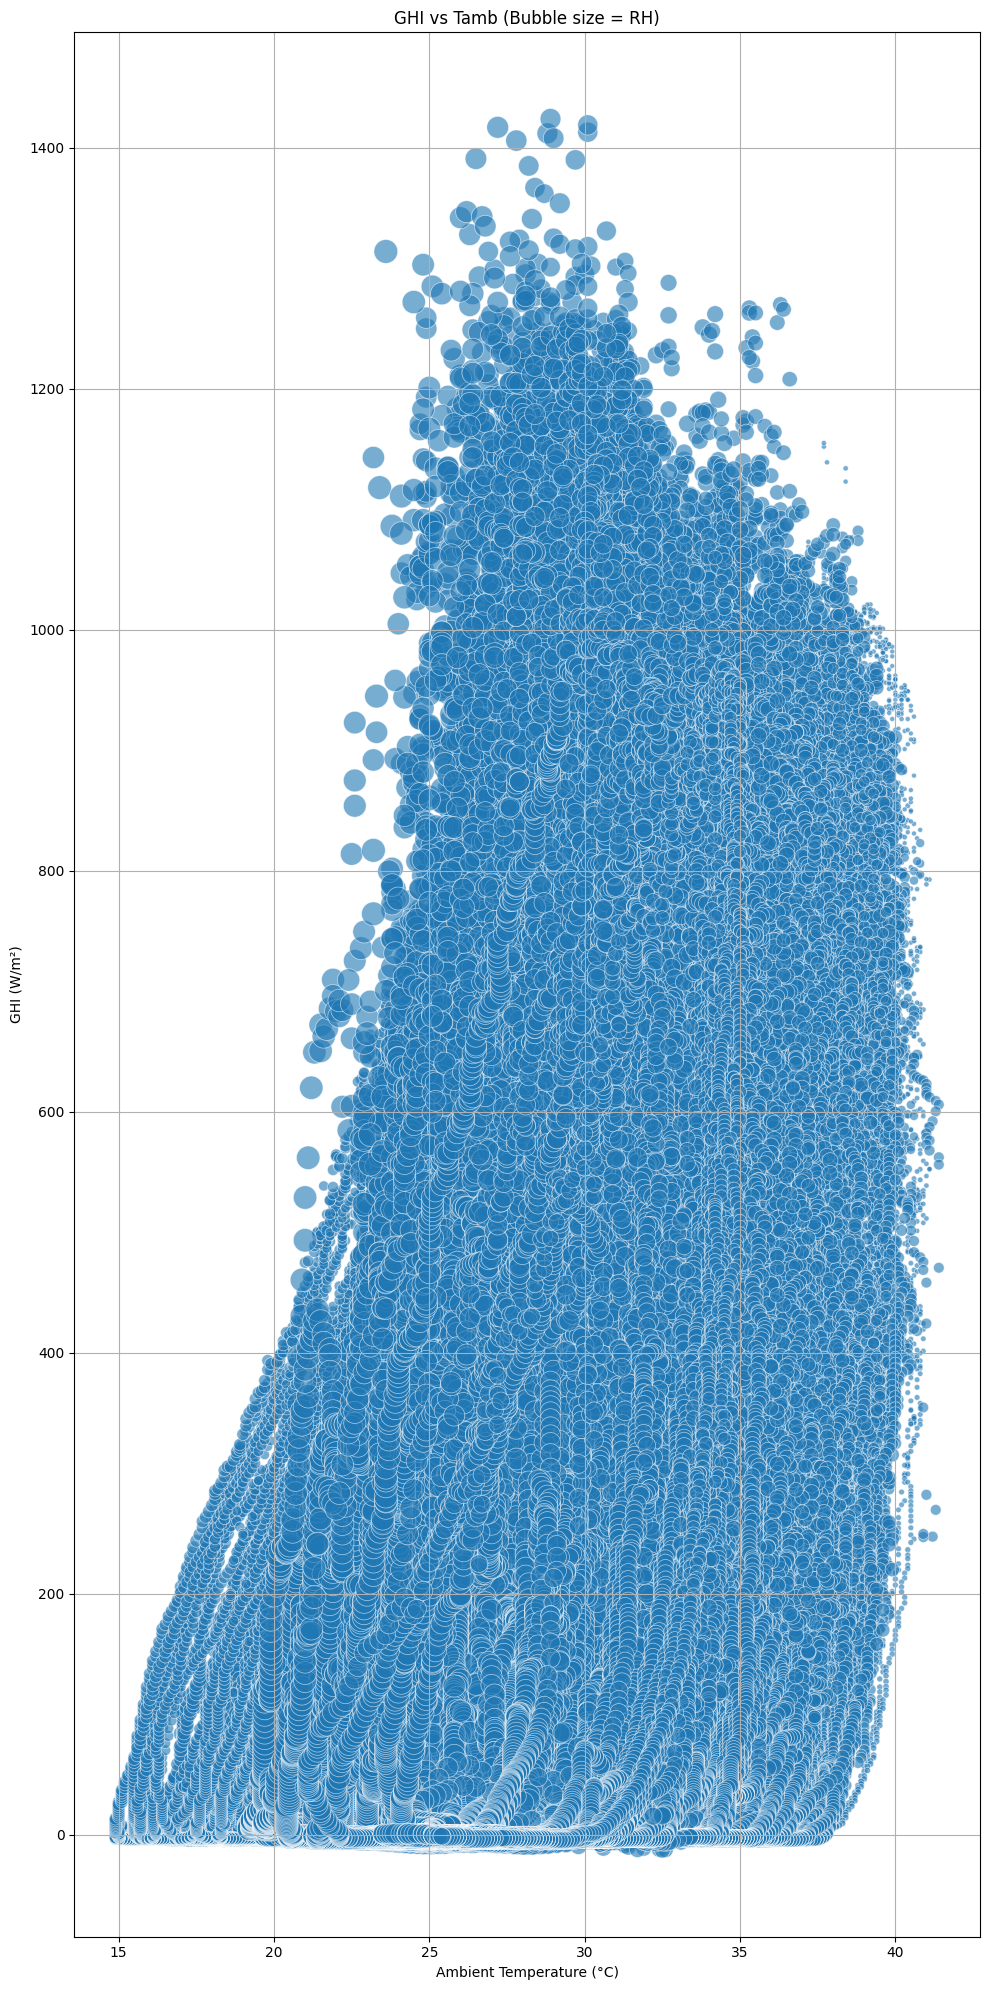

In [33]:
plt.figure(figsize=(10, 20))
sns.scatterplot(data=df_clean, x='Tamb', y='GHI', size='RH', alpha=0.6, sizes=(10, 300), legend=False)
plt.title('GHI vs Tamb (Bubble size = RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()
